<a href="https://colab.research.google.com/github/soumyajt1991/Topic-Modeling-on-News-Articles/blob/main/Soumyajit_Das_Team_3_Topic_Modeling_on_News_Articles_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)


In [1]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import string
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import spacy
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
news=[]
topics=[]

path="/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 1/bbc/"

folders=['business','entertainment','politics','sport','tech'] 

for i in folders:
    all_files=os.listdir(path+i)
    for txt_files in all_files:
        files_path=path+i+'/'+txt_files
        with open(files_path,'rb') as f:
            text=f.read()
        news.append(text)
        topics.append(i)

bbc = {'news':news,'topics':topics}
bbc = pd.DataFrame(bbc)

In [4]:
bbc.head()

,news,topics
0,"b'India calls for fair trade rules\n\nIndia, w...",business
1,"b'Steel firm \'to cut\' 45,000 jobs\n\nMittal ...",business
2,b'Call centre users \'lose patience\'\n\nCusto...,business
3,b'Ethiopia\'s crop production up 24%\n\nEthiop...,business
4,"b""Safety alert as GM recalls cars\n\nThe world...",business


In [5]:
bbc.shape

(2225, 2)

In [6]:
bbc.news[0]

b'India calls for fair trade rules\n\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\n\nIn London on Thursday ahead of the meeting, India\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\n\nPalaniappan Chidambaram, India\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\'s population. At a conference on developing enterprise hosted by UK finance minister Gordon Brown

In [7]:
bbc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   topics  2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [8]:
bbc.describe(include='all').T

,count,unique,top,freq
news,2225,2127,b'SEC to rethink post-Enron rules\n\nThe US st...,2
topics,2225,5,sport,511


In [9]:
len(bbc[bbc.duplicated()])

98

In [10]:
# removing duplicate observations
bbc=bbc.drop_duplicates()

In [11]:
bbc.shape

(2127, 2)

In [12]:
bbc.topics.value_counts()

sport            505
business         503
politics         403
entertainment    369
tech             347
Name: topics, dtype: int64

In [13]:
bbc.topics.value_counts(normalize=True)*100

sport            23.742360
business         23.648331
politics         18.946874
entertainment    17.348378
tech             16.314057
Name: topics, dtype: float64

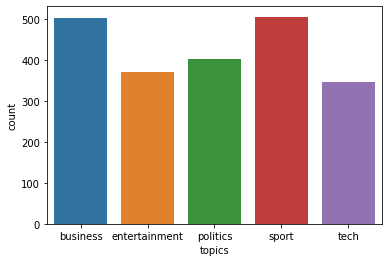

In [14]:
import warnings 
warnings.filterwarnings("ignore")
sns.countplot(bbc['topics'], data=bbc)
plt.show()

In [15]:
# creating dulicate of dataset for processing
bbc1=bbc.copy()

In [16]:
bbc1['news'] = bbc1['news'].astype('str') 

In [17]:
bbc1.news[0]

'b\'India calls for fair trade rules\\n\\nIndia, which attends the G7 meeting of seven leading industrialised nations on Friday, is unlikely to be cowed by its newcomer status.\\n\\nIn London on Thursday ahead of the meeting, India\\\'s finance minister, lashed out at the restrictive trade policies of the G7 nations. He objected to subsidies on agriculture that make it hard for developing nations like India to compete. He also called for reform of the United Nations, the World Bank and the IMF.\\n\\nPalaniappan Chidambaram, India\\\'s finance minister, argued that these organisations need to take into account the changing world order, given India and China\\\'s integration into the global economy. He said the issue is not globalisation but "the terms of engagement in globalisation." Mr Chidambaram is attending the G7 meeting as part of the G20 group of nations, which account for two thirds of the world\\\'s population. At a conference on developing enterprise hosted by UK finance minis

In [18]:
# text pre-processing

In [19]:
# Remove HTML tags

In [20]:
import re
def remove_html_tags(text):
	html_pattern = r'<.*?>'
	without_html = re.sub(pattern=html_pattern, repl=' ', string=text)
	return without_html

In [21]:
bbc1['news'] = bbc1['news'].apply(remove_html_tags)

In [22]:
# Remove urls

In [23]:
def remove_urls(text):
	url_pattern = r'https?://\S+|www\.\S+' 
	without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
	return without_urls

In [24]:
bbc1['news'] = bbc1['news'].apply(remove_urls)

In [ ]:
# Convert accented characters to ASCII characters

In [25]:
pip install Unidecode

     |████████████████████████████████| 245kB 8.4MB/s 


In [26]:
import unidecode

def accented_to_ascii(text):
	text = unidecode.unidecode(text)
	return text

In [27]:
bbc1['news'] = bbc1['news'].apply(accented_to_ascii)

In [28]:
# remove punctuations

In [29]:
def remove_punctuation(text):    
  translator = str.maketrans('', '', string.punctuation)
  return text.translate(translator)

In [30]:
bbc1['news'] = bbc1['news'].apply(remove_punctuation)

In [31]:
# Remove numbers

In [32]:
def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

In [33]:
bbc1['news'] = bbc1['news'].apply(remove_numbers)

In [34]:
# Lowercase all texts

In [35]:
def lower_case_convertion(text):
	lower_text = text.lower()
	return lower_text

In [36]:
bbc1['news'] = bbc1['news'].apply(lower_case_convertion)

In [ ]:
# Split attached words

In [ ]:
def split_word(text):
  split = re.split("([A-Z][a-z]+[^A-Z]*)",text)
  return " ".join(split)

In [ ]:
bbc1['news'] = bbc1['news'].apply(split_word)

In [ ]:
# Removing short length words

In [37]:
bbc1['news'] = bbc1['news'].apply(lambda x: ' '.join([wds for wds in x.split() if len(wds)>2]))

In [38]:
# Remove extra whitespaces

In [39]:
def remove_extra_spaces(text):
	space_pattern = r'\s+'
	without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
	return without_space

In [40]:
bbc1['news'] = bbc1['news'].apply(remove_extra_spaces)

In [ ]:
# Standardizing and Spelling correction

In [ ]:
 pip install autocorrect

     |████████████████████████████████| 624kB 6.4MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp36-none-any.whl size=621588 sha256=d14905d188c684401e90fee20760ac16bfa6b778def63e34edbf81f42bdb842d
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


In [ ]:
import itertools
from autocorrect import Speller

def correction(text):
  standz = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text)) 
  spell = Speller(lang='en') 
  correct_spell=spell(standz) 
  return correct_spell

In [ ]:
bbc1['news'] = bbc1['news'].apply(correction)

In [41]:
# Lemmatization

In [42]:
from nltk.stem import WordNetLemmatizer 
from nltk import word_tokenize

In [43]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [44]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

def lemmatize_word(text): 
	lemmas = [lemmatizer.lemmatize(wds, pos ='v') for wds in text.split()] 
	return " ".join(lemmas) 

In [45]:
bbc1['news'] = bbc1['news'].apply(lemmatize_word)

In [46]:
# remove stopwords

In [47]:
from nltk.corpus import stopwords
import spacy
import gensim

# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))
sp = spacy.load('en_core_web_sm')
# list of stopwords from spacy
stopwords_spacy = list(sp.Defaults.stop_words)
# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)
# all unique stop words
all_stopwords = list(set(all_stopwords))



def stop_words(text):  
  text = [wd.lower() for wd in text.split() if wd.lower() not in all_stopwords]
  return " ".join(text)

In [48]:
bbc1['news'] = bbc1['news'].apply(stop_words)

In [49]:
# remove frequent words

In [52]:
freq = pd.Series(' '.join(bbc1['news']).split()).value_counts()[:15]
freq

people        1856
new           1831
game          1517
year          1461
use           1382
win           1357
time          1355
come          1164
play          1142
years         1125
company       1049
film          1023
tell          1013
work          1009
government     981
dtype: int64

In [53]:
freq_words = ['use','come','tell']

In [54]:
bbc1['news'] = bbc1['news'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_words))

In [ ]:
bbc1.news[0]

'bindia fair trade rulesnnindia attend meet seven lead industrialise nations friday unlikely cow newcomer statusnnin london thursday ahead meet indias finance minister lash restrictive trade policies nations object subsidies agriculture hard develop nations like india compete reform unite nations world bank imfnnpalaniappan chidambaram indias finance minister argue organisations need account change world order india chinas integration global economy issue globalisation term engagement globalisation chidambaram attend meet group nations account thirds worlds population conference develop enterprise host uk finance minister gordon brown friday favour float exchange rat help countries cope economic shock flexible exchange rate channel absorb positive negative shock conference india china brazil south africa russia invite meet place london friday saturday china expect face renew pressure abandon fix exchange rate nations particular blame surge cheap chinese export countries try fix exchang

In [61]:
from wordcloud import WordCloud

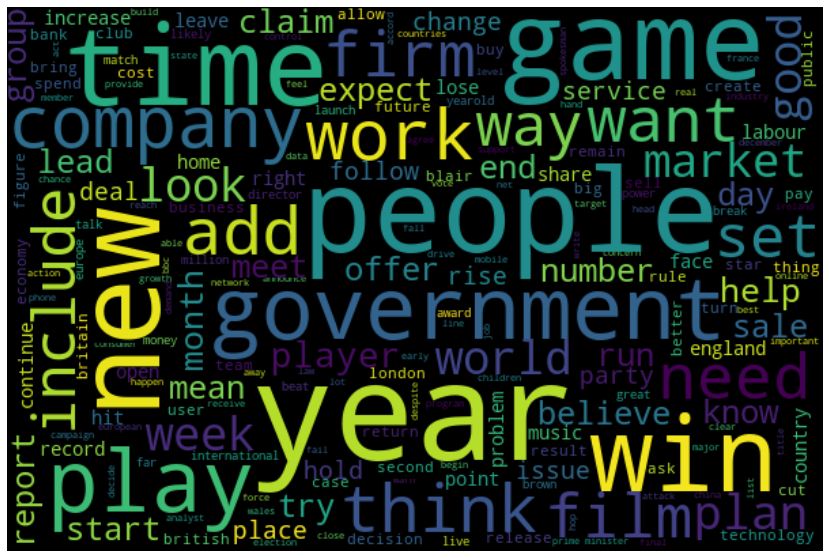

In [73]:
plt.figure(figsize=(15,10))
allWords = ' '.join(bbc1['news'])
wordCloud = WordCloud(width=600, height=400, random_state=0, max_font_size=100).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# feature extraction

In [74]:
# length of documents

In [75]:
bbc1['length']=bbc1['news'].apply(len)
bbc1.head()

,news,topics,length
0,bindia fair trade rulesnnindia attend meet sev...,business,1169
1,bsteel firm cut jobsnnmittal steel worlds larg...,business,932
2,bcall centre users lose patiencenncustomers tr...,business,2092
3,bethiopias crop production nnethiopia produce ...,business,1008
4,bsafety alert recall carsnnthe worlds biggest ...,business,1150


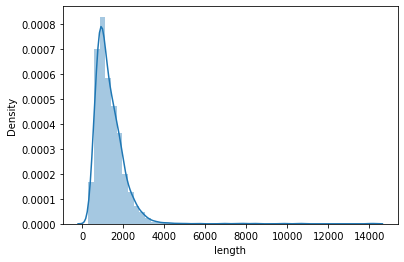

In [76]:
# distplot
sns.distplot(bbc1['length'])
plt.show()

In [77]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

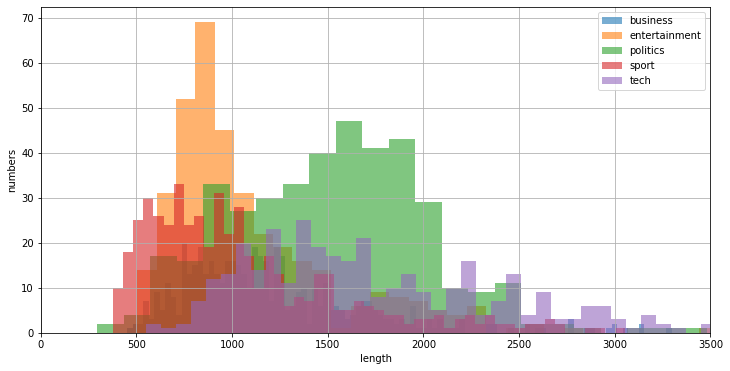

In [78]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['length'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['length'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['length'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['length'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['length'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,3500)
plt.grid()
plt.show()

In [79]:
# number of words

In [80]:
bbc1['word_count'] = bbc1['news'].apply(lambda x: len(str(x).split(" ")))
bbc1.head()

,news,topics,length,word_count
0,bindia fair trade rulesnnindia attend meet sev...,business,1169,155
1,bsteel firm cut jobsnnmittal steel worlds larg...,business,932,121
2,bcall centre users lose patiencenncustomers tr...,business,2092,281
3,bethiopias crop production nnethiopia produce ...,business,1008,126
4,bsafety alert recall carsnnthe worlds biggest ...,business,1150,155


In [81]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

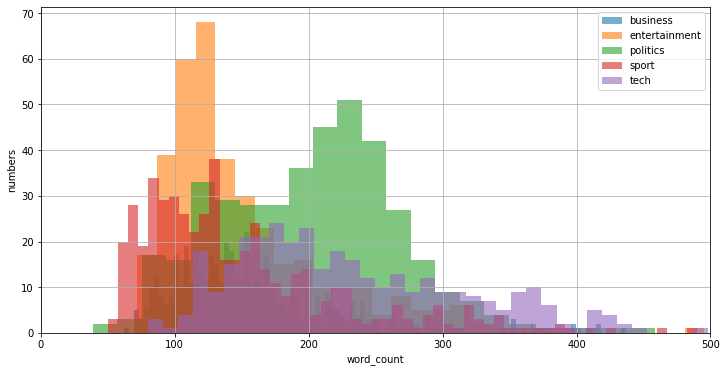

In [84]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 100
plt.hist(bbc1_business['word_count'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['word_count'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['word_count'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['word_count'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['word_count'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('word_count')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,500)
plt.grid()
plt.show()

In [85]:
# Average Word Length

In [86]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
bbc1['avg_word'] = bbc1['news'].apply(lambda x: avg_word(x))
bbc1.head()

,news,topics,length,word_count,avg_word
0,bindia fair trade rulesnnindia attend meet sev...,business,1169,155,6.548387
1,bsteel firm cut jobsnnmittal steel worlds larg...,business,932,121,6.710744
2,bcall centre users lose patiencenncustomers tr...,business,2092,281,6.448399
3,bethiopias crop production nnethiopia produce ...,business,1008,126,7.007937
4,bsafety alert recall carsnnthe worlds biggest ...,business,1150,155,6.425806


In [87]:
bbc1_business = bbc1[bbc1['topics'] == 'business']
bbc1_entertainment = bbc1[bbc1['topics'] == 'entertainment']
bbc1_politics = bbc1[bbc1['topics'] == 'politics']
bbc1_sport = bbc1[bbc1['topics'] == 'sport']
bbc1_tech = bbc1[bbc1['topics'] == 'tech']

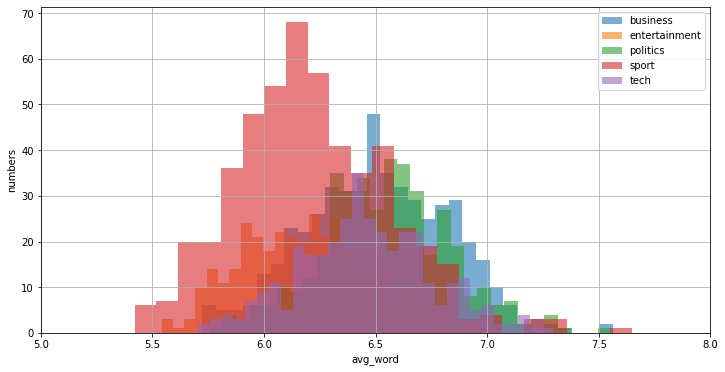

In [88]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
bins = 30
plt.hist(bbc1_business['avg_word'], alpha = 0.6, bins=bins, label='business')
plt.hist(bbc1_entertainment['avg_word'], alpha = 0.6, bins=bins, label='entertainment')
plt.hist(bbc1_politics['avg_word'], alpha = 0.6, bins=bins, label='politics')
plt.hist(bbc1_sport['avg_word'], alpha = 0.6, bins=bins, label='sport')
plt.hist(bbc1_tech['avg_word'], alpha = 0.6, bins=bins, label='tech')
plt.xlabel('avg_word')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(5,8)
plt.grid()
plt.show()

In [ ]:
# vectorization

In [95]:
vectorizer = TfidfVectorizer(max_df = 0.8, min_df = 0.1, max_features= 6000, stop_words= 'english')
small_document_term_matrix = vectorizer.fit_transform(bbc1['news'])

In [102]:
# Latent Dirichlet allocation (LDA)

In [96]:
# LDA model
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

lda = LatentDirichletAllocation(n_components=5, max_iter=100, n_jobs=-1)
lda.fit(small_document_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=100,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [91]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 9.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=1b26454a1f13ba4d20b9ec6cf50190b7cfa8e9be30094d4a7b4c757c26a8aa64
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [97]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [98]:
lda_panel = pyLDAvis.sklearn.prepare(lda, small_document_term_matrix,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
4      150.222153  -72.269554       1        1  23.502235
1       51.163364 -159.968018       2        1  22.343202
2      -73.144554   21.523815       3        1  22.162106
3      -66.410133 -110.606438       4        1  20.557651
0       54.417324   12.443444       5        1  11.434807, topic_info=       Term        Freq       Total Category  logprob  loglift
53     film  122.000000  122.000000  Default  30.0000  30.0000
142    star   73.000000   73.000000  Default  29.0000  29.0000
12     best   84.000000   84.000000  Default  28.0000  28.0000
58     game  121.000000  121.000000  Default  27.0000  27.0000
79   labour   69.000000   69.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
105     new   17.481617  126.146772   Topic5  -4.0560   0.1922
160    year   15.915928  113.616669   Topic5  -4.1498   0.2030
134  second    9.448509   65.162465   Topic5  -4.6713   0.2375
150    time   11.667909   98.875432   Topic5  -4.4603   0.0315
158    work    9.735639   86.215358   Topic5  -4.6413  -0.0125

[220 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
0         1  0.236902   able
0         2  0.088838   able
0         3  0.177676   able
0         4  0.444191   able
0         5  0.029613   able
...     ...       ...    ...
162       1  0.185785  years
162       2  0.196714  years
162       3  0.196714  years
162       4  0.174857  years
162       5  0.240428  years

[657 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 3, 4, 1])

In [121]:
terms_nmf = vectorizer.get_feature_names()

In [122]:
for i, comp in enumerate(lda.components_):
  terms_comp = zip(terms_lda, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
  print("topic "+str(i)+": ")
  for t in sorted_words:
      print(t[0],end=" ")
  print("\n")

topic 0: 
film star best include win record years director number play british new year hit world place bbc follow yearold time 

topic 1: 
company firm market rise price share year buy deal report chief cost new expect business figure fall increase group cut 

topic 2: 
game win play match england team players world second time good open yearold great start chance think set try lose 

topic 3: 
people game service new work firm million company help like offer launch year want way time industry market number sell 

topic 4: 
labour party government minister people plan public issue claim rule new general right case meet want spokesman home bbc need 



In [123]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda.components_[index]
  terms_comp = zip(terms_lda, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

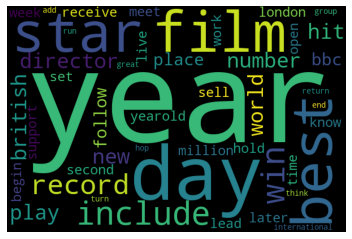

In [124]:
draw_word_cloud(0)

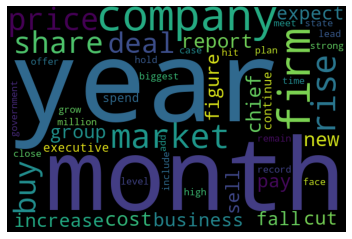

In [125]:
draw_word_cloud(1)

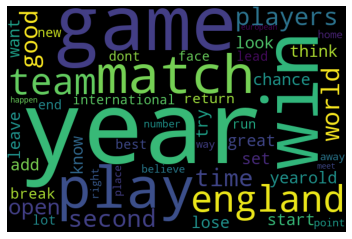

In [127]:
draw_word_cloud(2)

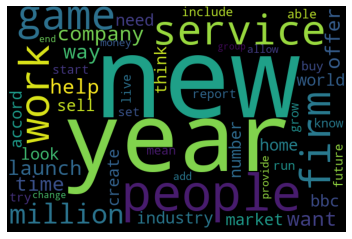

In [128]:
draw_word_cloud(3)

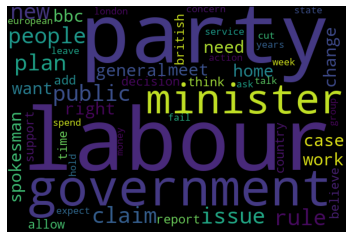

In [129]:
draw_word_cloud(4)

In [ ]:
# Non-negative matrix factorization (NMF)

In [100]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=5, max_iter=100)
nmf.fit(small_document_term_matrix)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=100,
    n_components=5, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [101]:
nmf_panel = pyLDAvis.sklearn.prepare(cls, small_document_term_matrix,vectorizer,mds='tsne')
nmf_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      150.222153  -72.269554       1        1  25.647151
3       51.163364 -159.968018       2        1  24.618506
0      -73.144554   21.523815       3        1  20.082595
4      -66.410133 -110.606438       4        1  19.920107
2       54.417324   12.443444       5        1   9.731641, topic_info=        Term        Freq       Total Category  logprob  loglift
53      film  181.000000  181.000000  Default  30.0000  30.0000
58      game  142.000000  142.000000  Default  29.0000  29.0000
27   company  103.000000  103.000000  Default  28.0000  28.0000
54      firm  100.000000  100.000000  Default  27.0000  27.0000
79    labour  112.000000  112.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
125   record    7.119463   63.810399   Topic5  -4.7930   0.1367
160     year    8.803844  121.092160   Topic5  -4.5806  -0.2916
159    world    7.415222   82.377982   Topic5  -4.7523  -0.0780
150     time    7.539331   96.296742   Topic5  -4.7357  -0.2175
113   people    7.596175  130.655111   Topic5  -4.7282  -0.5151

[220 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
0         1  0.258046    able
0         2  0.322557    able
0         3  0.354813    able
0         5  0.064511    able
1         1  0.024498  accord
...     ...       ...     ...
162       1  0.251216   years
162       2  0.152914   years
162       3  0.109224   years
162       4  0.283984   years
162       5  0.207526   years

[588 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])

In [131]:
terms_nmf = vectorizer.get_feature_names()

In [132]:
for i, comp in enumerate(nmf.components_):
  terms_comp = zip(terms_nmf, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
  print("topic "+str(i)+": ")
  for t in sorted_words:
      print(t[0],end=" ")
  print("\n")

topic 0: 
company firm share new buy service deal people offer group sell market chief business pay executive work industry case plan 

topic 1: 
game play win match players england team world time second good open think like start great look chance set lose 

topic 2: 
film star best include director win years british new work million play receive number bbc live hit day year place 

topic 3: 
labour party government minister people plan public issue claim general bbc work home want new spokesman change think right need 

topic 4: 
rise year price market figure fall increase record report spend cost expect grow million strong hit continue high cut remain 



In [133]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=nmf.components_[index]
  terms_comp = zip(terms_nmf, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

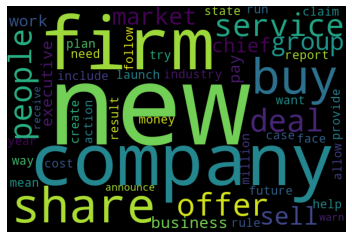

In [134]:
draw_word_cloud(0)

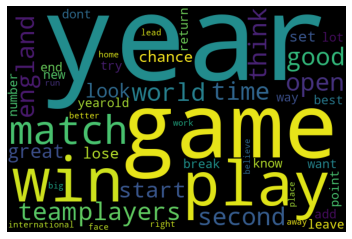

In [135]:
draw_word_cloud(1)

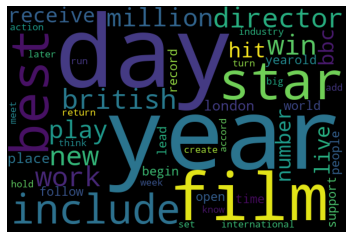

In [136]:
draw_word_cloud(2)

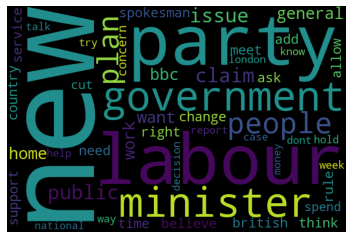

In [137]:
draw_word_cloud(3)

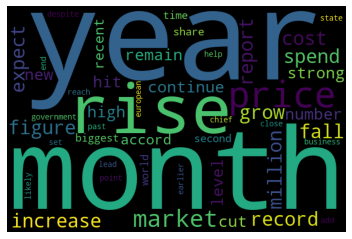

In [138]:
draw_word_cloud(4)

In [ ]:
# Latent Semantic Analysis (LSA)

In [104]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, algorithm='randomized', n_iter=100, random_state=0)
svd.fit(small_document_term_matrix)

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=100, random_state=0,
             tol=0.0)

In [139]:
terms_lsa = vectorizer.get_feature_names()

In [140]:
for i, comp in enumerate(svd.components_):
  terms_comp = zip(terms_lsa, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:20]
  print("topic "+str(i)+": ")
  for t in sorted_words:
      print(t[0],end=" ")
  print("\n")

topic 0: 
people game new win year play company time film firm work years government world want plan think market number like 

topic 1: 
game win film play best star match players england team world yearold second open good great chance start time lot 

topic 2: 
film star best director include company million share years british year receive firm hit rise new industry market biggest accord 

topic 3: 
labour party minister government public people film plan general bbc issue claim british country spokesman best home right think want 

topic 4: 
game people film service firm work like want company offer launch create mean way allow industry news players home able 



In [141]:
def draw_word_cloud(index):
  imp_words_topic=""
  comp=svd.components_[index]
  terms_comp = zip(terms_lsa, comp)
  sorted_words = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

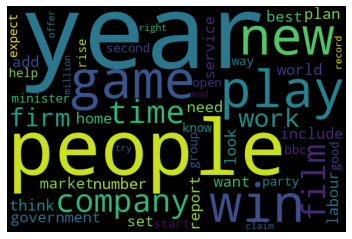

In [142]:
draw_word_cloud(0)

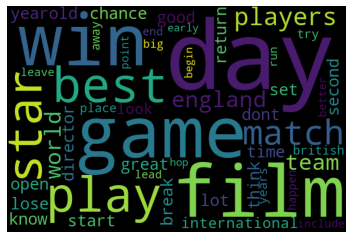

In [143]:
draw_word_cloud(1)

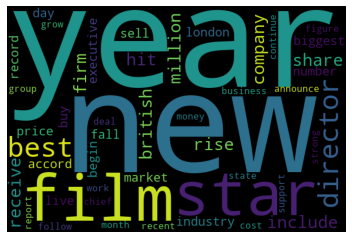

In [144]:
draw_word_cloud(2)

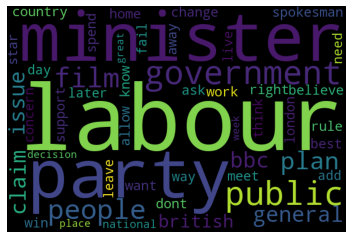

In [145]:
draw_word_cloud(3)

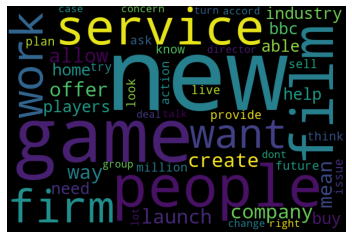

In [146]:
draw_word_cloud(4)

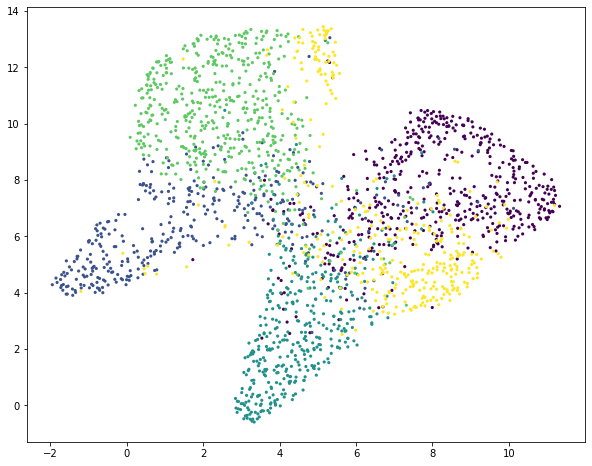

In [118]:
import umap

all_topics = svd.fit_transform(small_document_term_matrix)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=0).fit_transform(all_topics)
bbc1['target'] = pd.factorize(bbc1['topics'])[0] + 1

plt.figure(figsize=(10,8))
plt.scatter(embedding[:, 0], embedding[:, 1], c = bbc1.target, s = 10, edgecolor='none')
plt.show()

In [ ]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

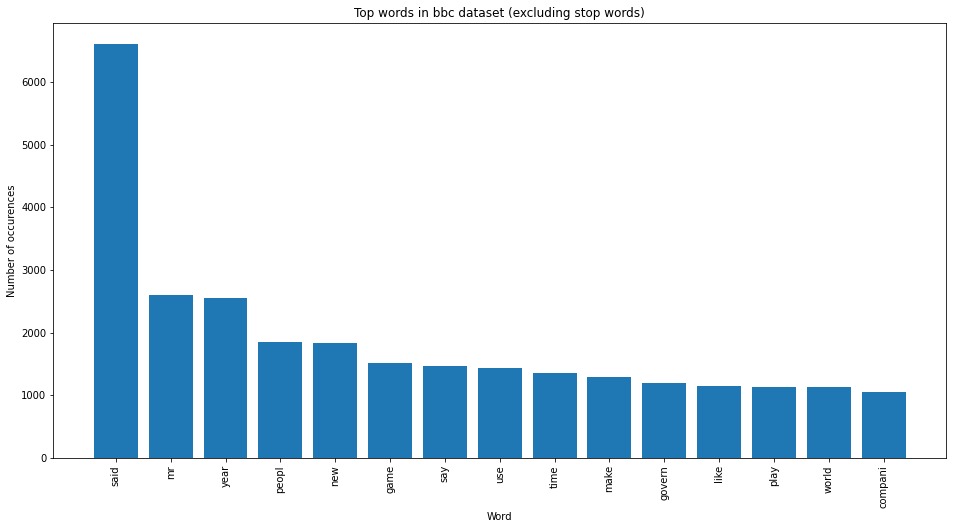

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=bbc1['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in bbc dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.8,min_df = 20)
news1 = vectorizer.fit_transform(bbc1['news'])

In [ ]:
print(vectorizer.get_feature_names())

['00', '003', '007', '01', '0100', '0130', '02', '027', '03', '030', '0305', '04', '0400', '05', '06', '07', '08', '0800', '09', '0900', '10', '100', '1000', '10000', '100000', '10000m', '1000m', '1000th', '100bn', '100m', '100mn', '100s', '101', '1015', '102', '1020', '103', '1030', '103bn', '104', '104000', '1044', '106', '107', '107bn', '108', '1080', '109', '10bn', '10day', '10game', '10km', '10m', '10minut', '10month', '10n', '10th', '10year', '11', '110', '1100', '11000', '110000', '110m', '112', '113', '1130', '113bn', '114', '115', '115bn', '117', '118', '118m', '119', '11bn', '11m', '11pm', '11th', '12', '120', '1200', '12000', '120000', '120gb', '120m', '121', '1218', '123', '1230', '124', '125', '12500', '125000', '125m', '126', '12600', '127', '127th', '128', '129', '12bn', '12member', '12nation', '12th', '12yearold', '13', '130', '1300', '13000', '130000', '131', '132', '1324', '133', '133bn', '133m', '134', '135', '136', '136m', '137', '138', '13bn', '13m', '13n', '13nnso

In [ ]:
len(vectorizer.get_feature_names())

14197

In [ ]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

In [ ]:
lda_panel = pyLDAvis.sklearn.prepare(best_lda_model, small_document_term_matrix,small_count_vectorizer,mds='tsne')
lda_panel

In [ ]:
# Collect vocabulary count

In [ ]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(data['text'])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
#Store the vocab and counts in a pandas dataframe

In [ ]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

In [ ]:
top_vacab = vocab_bef_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (25230, 25260))

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_df = 0.9,min_df = 2)
X = vectorizer.fit_transform(message['tokenized_message'])

In [ ]:
# list of unique words found by the vectorizer

In [ ]:
print(vectorizer.get_feature_names())

In [ ]:
len(vectorizer.get_feature_names())

In [ ]:
# number of most influencing words to display per topic
n_top_words = 15

for i, topic_vec in enumerate(cls.components_):
    print(i, end=' ')
    # topic_vec.argsort() produces a new array
    # in which word_index with the least score is the
    # first array element and word_index with highest
    # score is the last array element. Then using a
    # fancy indexing [-1: -n_top_words-1:-1], we are
    # slicing the array from its end in such a way that
    # top `n_top_words` word_index with highest scores
    # are returned in desceding order
    for fid in topic_vec.argsort()[-1:-n_top_words-1:-1]:
        print(feature_names[fid], end=' ')
    print()

In [ ]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [ ]:
count_vectorizer = CountVectorizer()
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df['news'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values)
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in headlines dataset (excluding stop words)')
ax.set_xlabel('Word')
ax.set_ylabel('Number of occurences')
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
allWords = ' '.join([topic for topic in df[df['type']=='sport']['news']])
wordCloud = WordCloud(width=500, height=300, background_color="white", random_state=21, max_font_size=110).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
n_topics = 5

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vec = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.1)
features = vec.fit_transform(df.text)

In [ ]:
df1 = pd.DataFrame(features.todense() , columns=vec.get_feature_names())

In [ ]:
df1.head()

In [ ]:
# NMF